In [95]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
import time

driver = webdriver.Chrome()

driver.get("https://www.amazon.com")

In [96]:
keyword = "headset"
# assigning any keyword for searching
search_box = driver.find_element(By.ID, 'twotabsearchtextbox')
# typing the keyword in searchbox
search_box.send_keys(keyword)
# creating WebElement for a search button
search_button = driver.find_element(By.ID, 'nav-search-submit-button')
# clicking search_button
search_button.click()
# waiting for the page to download
driver.implicitly_wait(5)

In [128]:
# Arrays for keeping data
product_name = []
product_asin = []
product_price = []
product_ratings = []
product_ratings_num = []
product_link = []

In [129]:
while True:
    # Finding all items on the page
    
    items = wait(driver, 30).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "s-result-item s-asin")]')))
    
    for item in items:
        # finding name
        name = item.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]')
        product_name.append(name.text)

        # finding ASIN number 
        data_asin = item.get_attribute("data-asin")
        product_asin.append(data_asin)

        # finding price
        whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
        fraction_price = item.find_elements(By.XPATH, './/span[@class="a-price-fraction"]')

        if whole_price != [] and fraction_price != []:
            price = '.'.join([whole_price[0].text, fraction_price[0].text])
        else:
            price = 0
        product_price.append(price)

        # finding ratings box
        ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')

        # finding ratings and ratings_num
        if ratings_box != []:
            ratings = ratings_box[0].get_attribute('aria-label')
            ratings_num = ratings_box[1].get_attribute('aria-label')
        else:
            ratings, ratings_num = 0, 0

        product_ratings.append(ratings)
        product_ratings_num.append(str(ratings_num))
    
    next_button = driver.find_elements(By.XPATH, '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    if len(next_button) == 0:
        break
    else:
        # Clicking the "Next" button to go to the next page
        next_button[0].click()
        time.sleep(10)  

In [144]:
import pandas as pd


product_price = [str(p).replace('\uff0c', ',') for p in product_price]
rows = zip(product_name, product_asin, product_price, product_ratings, product_ratings_num)

df = pd.DataFrame(rows, columns=['Name', 'Asin', 'Price', 'Rating', 'Rating_Num'])

df.to_excel("product_list.xlsx", index=False)


### Cleaning Data

In [145]:
df

,Name,Asin,Price,Rating,Rating_Num
0,HyperX - Cloud Core Wired DTS Headphone:X Gami...,B08HQW9SGP,29.99,4.5 out of 5 stars,"120,267"
1,"Logitech H390 Wired Headset for PC/Laptop, Ste...",B09XQ5WSF5,24.99,4.4 out of 5 stars,"49,368"
2,BENGOO G9000 Stereo Gaming Headset for PS4 PC ...,B01H6GUCCQ,25.99,4.3 out of 5 stars,"98,456"
3,SENZER SG500 Surround Sound Pro Gaming Headset...,B08FX35S7K,29.99,4.3 out of 5 stars,"8,982"
4,"HyperX Cloud Stinger – Gaming Headset, Lightwe...",B0BHV2JT81,49.99,4.4 out of 5 stars,"22,383"
...,...,...,...,...,...
421,New bee Wireless Headset Bluetooth Headset wit...,B0BRRCJM6R,39.99,4.3 out of 5 stars,91
422,USB Headset for Zoom Online Meeting Video Conf...,B08L3FRW89,25.99,4.2 out of 5 stars,100
423,"KUNSLUCK PS VR2 Accessories Kit, Lens Protecto...",B0BX9CTCN8,13.99,3.5 out of 5 stars,2
424,Gaming Headset with 7.1 Surround Sound and Noi...,B0B82SLGB3,19.99,0,0


In [28]:
print(df['Name'].dtype)
print(df['Asin'].dtype)
print(df['Price'].dtype)
print(df['Rating'].dtype)
print(df['Rating_Num'].dtype)

object
object
float64
object
int32


In [27]:
# Converting types from object
df['Price'] = df['Price'].astype(float)
df['Name'] = df['Name'].astype(str)
df['Asin'] = df['Asin'].astype(str)
df['Rating'] = df['Rating'].astype(str)
df['Rating_Num'] = df['Rating_Num'].str.replace(',', '').astype(int)

In [20]:
# Cutting the string for Rating to convert to float
df['Rating'] = df['Rating'].astype(str).str[:3]
df['Rating'] = df['Rating'].astype(float)

In [21]:
# Checking for Duplicates
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

,Name,Asin,Price,Rating,Rating_Num,Gaming,Wired,Microphone,Bluetooth
7,"Logitech H390 Wired Headset for PC/Laptop, Ste...",B09XQ5WSF5,24.99,4.4,49368,1,1,1,0
34,HyperX - Cloud Core Wired DTS Headphone:X Gami...,B08HQW9SGP,29.99,4.5,120267,1,1,0,0
69,HyperX CloudX Stinger Core - Official Licensed...,B07KYC1VL7,19.99,4.5,26667,1,0,1,0
130,Cyber Acoustics 3.5mm Stereo Headset (AC-5002)...,B074JHQ8M3,17.35,4.2,11840,1,0,1,0
147,Trucker Bluetooth Angteela Headset with Microp...,B087QD67SS,42.99,4.3,9146,1,0,1,1
217,Sonitum Headset with Microphone - Noise Cancel...,B09JTTD2S4,17.97,4.3,3396,1,0,1,0
240,Emonoo Wired Headphone with Noise Cancelling M...,B0B947KV8B,19.99,4.3,114,1,1,1,0
263,Tatybo Gaming Headset for PS4 PS5 Xbox One Swi...,B09FXFSY6R,19.98,4.4,3144,1,0,1,0
295,TECKNET Trucker Bluetooth Headset with Microph...,B08RB26C8X,59.99,4.1,8915,1,0,1,1
333,"Bluetooth Headset with Microphone,V5.1,Noise C...",B09XFGFBLG,25.98,4.1,728,1,0,1,1


In [22]:
# Dropping any duplicates
df.drop_duplicates(subset=['Asin'], keep='first', inplace=True)

In [187]:
df

,Name,Asin,Price,Rating,Rating_Num
0,HyperX - Cloud Core Wired DTS Headphone:X Gami...,B08HQW9SGP,29.99,4.5,120267
1,"Logitech H390 Wired Headset for PC/Laptop, Ste...",B09XQ5WSF5,24.99,4.4,49368
2,BENGOO G9000 Stereo Gaming Headset for PS4 PC ...,B01H6GUCCQ,25.99,4.3,98456
3,SENZER SG500 Surround Sound Pro Gaming Headset...,B08FX35S7K,29.99,4.3,8982
4,"HyperX Cloud Stinger – Gaming Headset, Lightwe...",B0BHV2JT81,49.99,4.4,22383
...,...,...,...,...,...
417,"GIZORI Gaming Headset, Xbox Headset, Gaming He...",B09QKBV3KY,19.99,4.4,583
418,HyperX Cloud Alpha Wireless - Gaming Headset f...,B09TRW57WB,159.99,4.5,120267
420,Anivia Computer Gaming Headset -3.5mm Wired He...,B092M5DR6Q,21.61,4.4,155
421,New bee Wireless Headset Bluetooth Headset wit...,B0BRRCJM6R,39.99,4.3,91


#### Question 1: What is the distribution of headset prices in the dataset? 

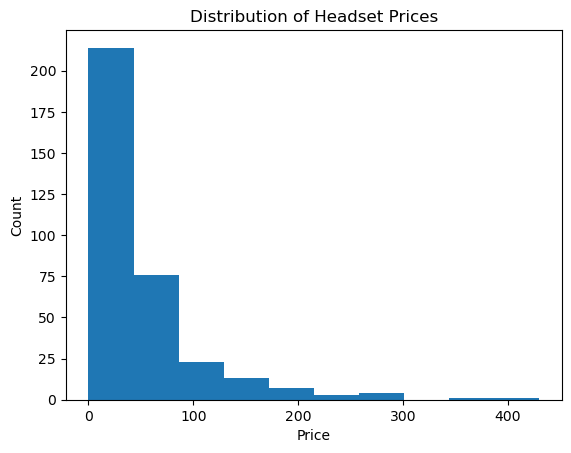

In [192]:
import matplotlib.pyplot as plt

# Creating a histogram of the headset prices
plt.hist(df['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Headset Prices')
plt.show()

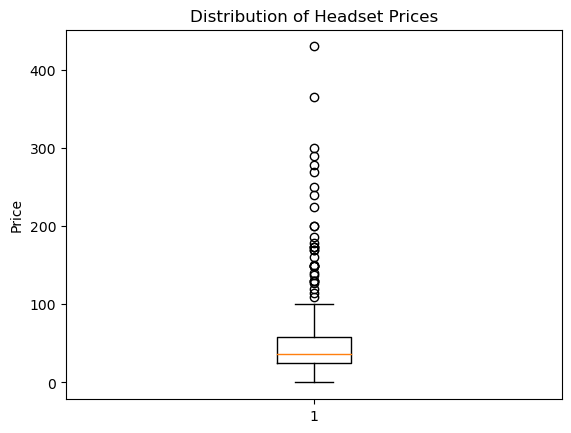

In [193]:
# Seeing how the boxplot would look like
plt.boxplot(df['Price'])
plt.ylabel('Price')
plt.title('Distribution of Headset Prices')
plt.show()

#### Question 2: Is there a correlation between price and rating? 

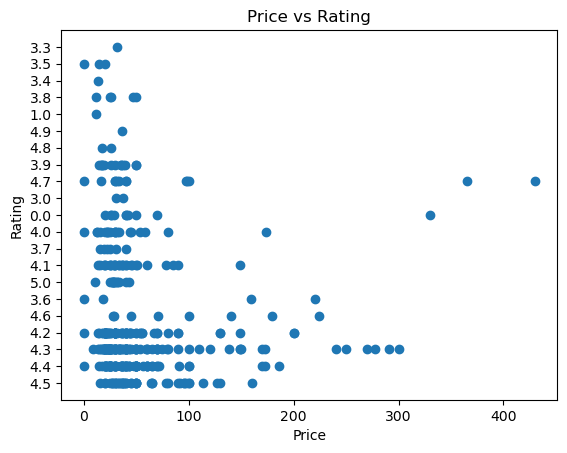

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U3')) -> None

In [41]:
import scipy.stats as stats

# Creating a scatter plot of price vs rating
plt.scatter(df['Price'], df['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.show()

# Calculating the Pearson correlation coefficient
corr, _ = stats.pearsonr(df['Price'], df['Rating'])
print('Pearson correlation coefficient: %.3f' % corr)

#### Question 3: How do the ratings of the headsets vary by price range? 

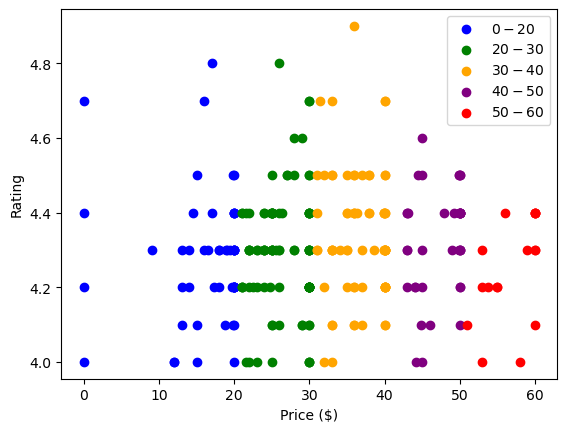

In [198]:
# Defining the price ranges
price_ranges = [(0, 20), (20, 30), (30, 40), (40, 50), (50, 60)]

# Defining the colors for the price ranges
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Creating a scatter plot for each price range
for i, price_range in enumerate(price_ranges):
    x = df[(df['Price'] >= price_range[0]) & (df['Price'] < price_range[1])]['Price']
    y = df[(df['Price'] >= price_range[0]) & (df['Price'] < price_range[1])]['Rating']
    plt.scatter(x, y, color=colors[i], label=f'${price_range[0]}-${price_range[1]}')

# Adding axis labels and legend
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.legend()

# Displaying the plot
plt.show()

#### Question 4: How many headsets fall under each rating category?

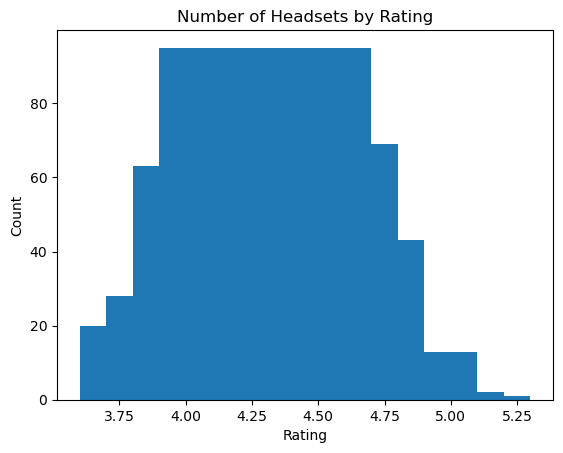

In [200]:
# grouping the data by the 'Rating' column and counting the number of occurrences for each unique value
rating_counts = df.groupby('Rating')['Name'].count()

# creating a bar chart to visualize the counts for each rating category
plt.bar(rating_counts.index, rating_counts.values)

# adding axis labels and a chart title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of Headsets by Rating')

# displaying the chart
plt.show()

#### Question 5: How many headsets fall under each price category?

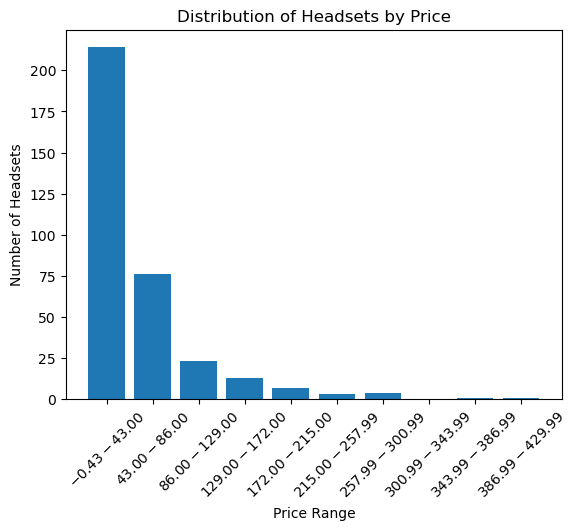

In [209]:
# Dividing the prices into 10 equal-sized bins
bins = pd.cut(df['Price'], bins=10)

# Counting the number of headsets in each bin
headsets_by_price = bins.value_counts().sort_index()

# Creating a bar chart that shows the number of headsets in each price interval
fig, ax = plt.subplots()
ax.bar(range(len(headsets_by_price)), headsets_by_price)
ax.set_xticks(range(len(headsets_by_price)))
ax.set_xticklabels(['${:.2f}-${:.2f}'.format(bin.left, bin.right) for bin in headsets_by_price.index], rotation=45)
ax.set_xlabel('Price Range')
ax.set_ylabel('Number of Headsets')
ax.set_title('Distribution of Headsets by Price')
plt.show()

In [15]:
# splitting the names into individual words
words = df["Name"].str.split(expand=True).stack()

# counting the frequency of each word
word_counts = words.value_counts()

# showing the top 50 most common words
print(word_counts.head(50))

Headset        519
with           481
for            455
-              335
Gaming         288
Xbox           203
Noise          202
Microphone     165
Headphones     164
Wireless       148
PC             139
PC,            127
&              118
Mic            116
Cancelling     111
Wired          102
Bluetooth      101
Surround        91
and             89
USB             89
PS4,            86
Ear             86
PS5,            76
Stereo          75
Computer        73
Microphone,     72
Series          71
Black           69
PS4             69
Call            66
Canceling       63
Office          63
7.1             63
Switch,         62
Sound           61
–               58
One,            58
3.5mm           57
Headset,        56
PS5             54
Phone           52
Laptop          52
Memory          52
Nintendo        49
Switch          44
Cell            44
Center          43
One             42
Compatible      42
Home            42
dtype: int64


In [34]:
# Creating a new column with 1 if the name contains certain word and 0 if not
df['Gaming'] = df['Name'].str.contains('gaming|xbox|ps4|ps5|switch|nintendo', case=False).astype(int)
df['Wired'] = df['Name'].str.contains('wired', case=False).astype(int)
df['Microphone'] = df['Name'].str.contains('mic|microphone', case=False).astype(int)
df['Bluetooth'] = df['Name'].str.contains('bluetooth|wireless', case=False).astype(int)

In [35]:
df

,Name,Asin,Price,Rating,Rating_Num,Wired,Microphone,Bluetooth,Gaming
0,HyperX - Cloud Core Wired DTS Headphone:X Gami...,B08HQW9SGP,29.99,4.5,120267,1,0,0,1
1,"Logitech H390 Wired Headset for PC/Laptop, Ste...",B09XQ5WSF5,24.99,4.4,49368,1,1,0,0
2,BENGOO G9000 Stereo Gaming Headset for PS4 PC ...,B01H6GUCCQ,25.99,4.3,98456,0,1,0,1
3,SENZER SG500 Surround Sound Pro Gaming Headset...,B08FX35S7K,29.99,4.3,8982,0,1,0,1
4,"HyperX Cloud Stinger – Gaming Headset, Lightwe...",B0BHV2JT81,49.99,4.4,22383,0,1,0,1
...,...,...,...,...,...,...,...,...,...
420,Anivia Computer Gaming Headset -3.5mm Wired He...,B092M5DR6Q,21.61,4.4,155,1,1,0,1
421,New bee Wireless Headset Bluetooth Headset wit...,B0BRRCJM6R,39.99,4.3,91,0,1,1,0
422,USB Headset for Zoom Online Meeting Video Conf...,B08L3FRW89,25.99,4.2,100,0,1,0,0
423,"KUNSLUCK PS VR2 Accessories Kit, Lens Protecto...",B0BX9CTCN8,13.99,3.5,2,0,0,0,1


In [36]:
microphone_percent = df['Microphone'].mean() * 100
gaming_percent = df['Gaming'].mean() * 100
wired_percent = df['Wired'].mean() * 100
bluetooth_percent = df['Bluetooth'].mean() * 100

print(f"Microphone: {microphone_percent:.2f}%")
print(f"Gaming: {gaming_percent:.2f}%")
print(f"Wired: {wired_percent:.2f}%")
print(f"Bluetooth: {bluetooth_percent:.2f}%")

Microphone: 82.09%
Gaming: 61.44%
Wired: 26.87%
Bluetooth: 32.34%


In [58]:
# filtering data where gaming column is equal to 1
gaming_df = df[df['Gaming'] == 1]

# extracting an array of rating numbers
gaming_array = gaming_df['Rating'].values
gaming_array = gaming_array.astype(float)

# filtering data where gaming column is equal to 1
wired_df = df[df['Wired'] == 1]

# extracting an array of rating numbers
wired_array = gaming_df['Rating'].values
wired_array = wired_array.astype(float)

# filtering data where gaming column is equal to 1
microphone_df = df[df['Microphone'] == 1]

# extracting an array of rating numbers
microphone_array = microphone_df['Rating'].values
microphone_array = microphone_array.astype(float)

# filtering data where bluetooth column is equal to 1
bluetooth_df = df[df['Bluetooth'] == 1]

# extracting an array of rating numbers
bluetooth_array = bluetooth_df['Rating'].values
bluetooth_array = bluetooth_array.astype(float)

print(gaming_array.dtype)


float64


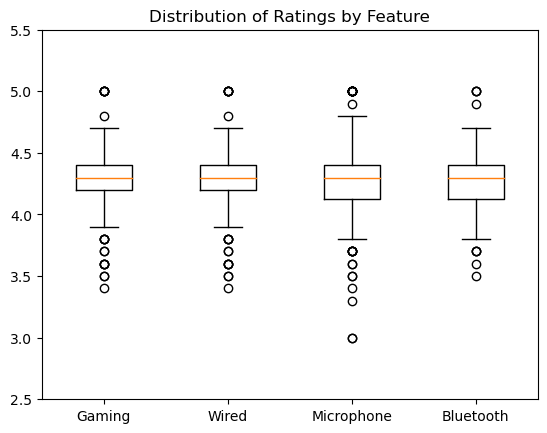

In [64]:
# Create a list of the four arrays to be plotted
data = [gaming_array, wired_array, microphone_array, bluetooth_array]

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a boxplot for each array
ax.boxplot(data)

# Set the y-axis range
ax.set_ylim([2.5, 5.5])

# Add labels to the x-axis
ax.set_xticklabels(['Gaming', 'Wired', 'Microphone', 'Bluetooth'])

# Add a title to the plot
plt.title('Distribution of Ratings by Feature')

# Display the plot
plt.show()

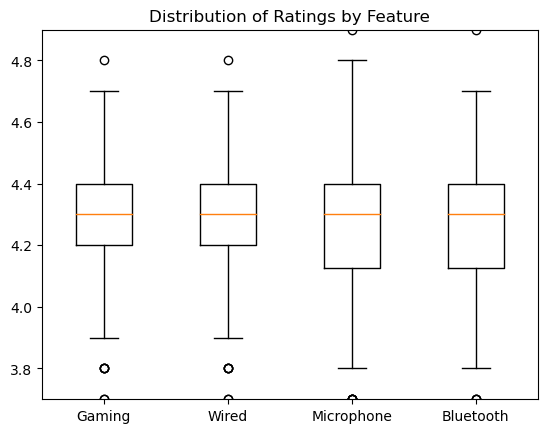

In [69]:
fig, ax = plt.subplots()

# Creating a boxplot for each array
ax.boxplot(data)

# Set the y-axis range
ax.set_ylim([3.7, 4.9])

# Adding labels to the x-axis
ax.set_xticklabels(['Gaming', 'Wired', 'Microphone', 'Bluetooth'])

# Adding a title to the plot
plt.title('Distribution of Ratings by Feature')

# Displaying the plot
plt.show()

In [72]:
print(len(gaming_array))
print(len(wired_array))
print(len(microphone_array))
print(len(bluetooth_array))

247
247
330
130


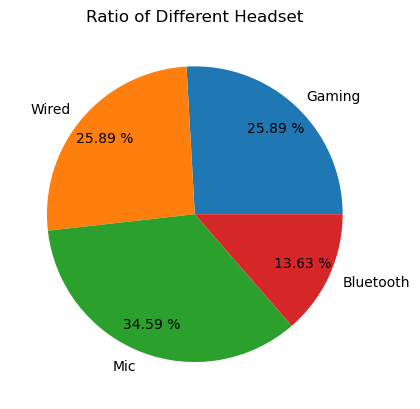

In [78]:
weights = [len(gaming_array),len(wired_array), len(microphone_array), len(bluetooth_array)]
label = ['Gaming', 'Wired', 'Mic', 'Bluetooth']

plt.title('Ratio of Different Headset')

plt.pie(weights, labels=label, pctdistance=0.8,autopct='%.2f %%')
plt.show()